In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml("mnist_784",version=1,as_frame=False)
mnist.keys()

## use as_frame = False or use 
## some_digit = X.to_numpy()[0] in the below cell
## or else error will pop
## it all depends on the version of fetch_openml

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [64]:
X,y = mnist.data, mnist.target
X.shape

## it means that there are 70000 images and each image has 784 (28*28) features

(70000, 784)

In [65]:
y.shape

(70000,)

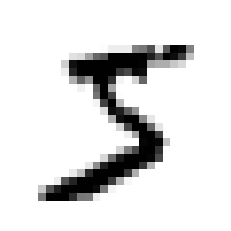

In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [67]:
## the above image looks like itis 5

y[0]

'5'

In [68]:
type(y[0])

## since the data type is string
## need to change to the int

str

In [69]:
y = y.astype(np.uint8)

In [70]:
## lets plot the digits in the dataset

def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis("off")


In [73]:
def plot_digits(instances, images_per_row=10,**options):
    size=28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[row*images_per_row : (row+1) * images_per_row]
        row_images.append(np.concatenate(rimages,axis=1))

    image = np.concatenate(row_images,axis=0)
    plt.imshow(image,cmap=mpl.cm.binary,**options)
    plt.axis('off')    


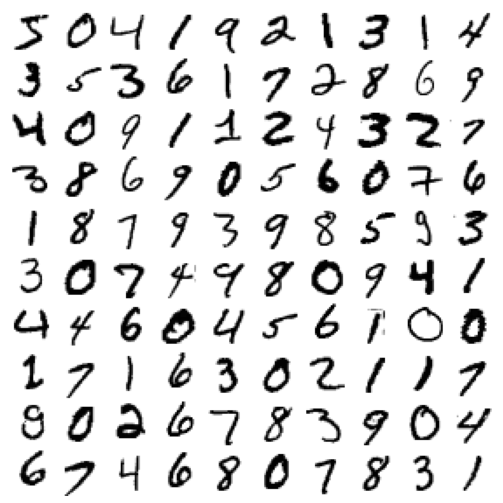

In [74]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show();

## Splitting the data

In [77]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## Binary Classifier

In [79]:
## lets create a data that is 5 and predicted as 5 by the machine

y_train_5 = (y_train==5)
y_test_5 = (y_test ==5)

In [80]:
## fit the model so that it should learn all the digits predicted as 5
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol = 1e-3, random_state = 42)
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [83]:
sgd_clf.predict([some_digit])

array([ True])

In [84]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index] 


    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [86]:
## classifying image that are not_5 type

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)


In [87]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5, cv=3,scoring='accuracy')

## almost 90% are not_5
## it means in the dataset, only 10% were 5

array([0.91125, 0.90855, 0.90915])

In [88]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5, cv=3)

In [89]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_pred, y_train_5)

array([[53892,  1891],
       [  687,  3530]], dtype=int64)

 53,892 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 1,891 were wrongly classified as 5s (false positives).
The second row considers the images of 5s (the positive class): 687 were wrongly
classified as non-5s (false negatives), while the remaining 3530 were correctly classi‐
fied as 5s (true positives). 

In [90]:
y_train_perfect_predictions = y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

An interesting one to look at is the accuracy of the positive pre‐
dictions; this is called the precision of the classifier

In [94]:
## Precision = TP/(TP+FP)

from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5, y_train_pred)



0.8370879772350012

In [108]:
## lets check it mathematically

cm = confusion_matrix(y_train_5, y_train_pred)

print(cm)

precision = cm[1,1] / (cm[1,1] + cm[0,1])
precision
## same as 3530/(3530+687)

[[53892   687]
 [ 1891  3530]]


0.8370879772350012

So precision is typically used
along with another metric named recall, also called sensitivity or true positive rate

Recall = TP/(TP+FN)

In [99]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [107]:
recall = cm[1,1] / (cm[1,1] + cm[1,0])
recall

0.6511713705958311

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1
 score is 
the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1
 score if both recall and precision are
high.

f1 = 2 / ((1/precision) + (1/recall)) = 2ab/(a+b)

In [103]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [111]:
## same as
a = precision
b = recall
print(2*a*b/(a+b))


0.7325171197343846


Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any threshold you want:


The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
result as the predict() method (i.e., True).

In [112]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [114]:
## lets set the threshold to zero

threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [115]:
## lets set the threshold to zero

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions

In [116]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [117]:
from sklearn.metrics import precision_recall_curve

precisions, recalls,thresholds = precision_recall_curve(y_train_5, y_scores)

In [135]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='precision', linewidth=2)
    plt.plot(thresholds,recalls[:-1],'g--',label='recall', linewidth=2)
    plt.legend(loc='center right',fontsize=16)
    plt.xlabel("threshold",fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])


In [145]:
recall_90_precision = recalls[np.argmax(precisions>=0.9)]
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

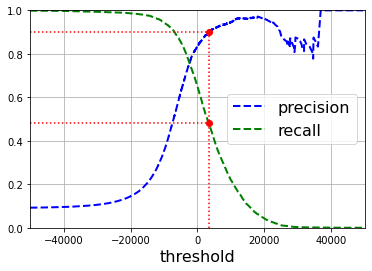

In [146]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                            
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")

You may wonder why the precision curve is bumpier than the recall
curve in Figure 3-4. The reason is that precision may sometimes go
down when you raise the threshold (although in general it will go
up). To understand why, look back at Figure 3-3 and notice what
happens when you start from the central threshold and move it just
one digit to the right: precision goes from 4/5 (80%) down to 3/4
(75%). On the other hand, recall can only go down when the thres‐
hold is increased, which explains why its curve looks smooth



So let’s suppose you decide to aim for 90% precision. You look up the first plot and
find that you need to use a threshold of about 8,000. To be more precise you can
search for the lowest threshold that gives you at least 90% precision (np.argmax()
will give us the first index of the maximum value, which in this case means the first
True value):

In [142]:
## lets see the values > threshold_90_precision valuses

y_train_pred == (y_scores > 0).all()

array([False,  True,  True, ..., False,  True,  True])

In [143]:
def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recalls,precisions,'b-',linewidth=2)
    plt.xlabel('Recall',fontsize=12)
    plt.ylabel("Precision",fontsize=12)
    plt.axis([0,1,0,1])
    plt.grid(True)

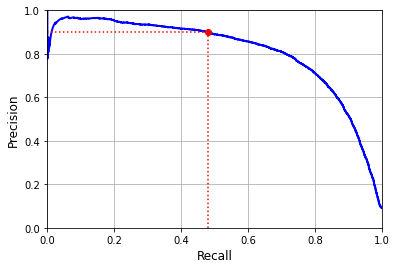

In [147]:
plot_precision_vs_recall(precisions,recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [148]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]
threshold_90_precision

3370.0194991439557

In [149]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [150]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Great, you have a 90% precision classifier ! As you can see, it is fairly easy to create a
classifier with virtually any precision you want: just set a high enough threshold, and
you’re done. Hmm, not so fast. A high-precision classifier is not very useful if its 
recall is too low!

## ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate. The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate, 
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.

TPR -> RECALL -> SENSITIVITY...............
FPR -> 1 - SPECIFICITY

In [151]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5, y_scores)

In [152]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel(" True positive rate")
    plt.grid(True)

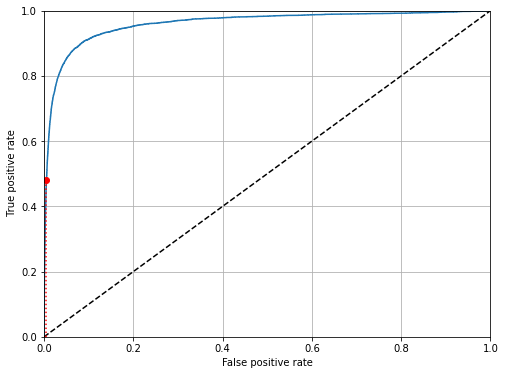

In [154]:
plt.figure(figsize=(8,6))
plot_roc_curve(fpr,tpr)

fpr_90 = fpr[np.argmax(tpr>= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")            
plt.show()


One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC:


In [155]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [158]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [165]:
y_probas_forest
## 1st col is probabilities 
## 2nd col is scores

## and for roc curve, we need scores and not prob

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [160]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5,y_scores_forest)

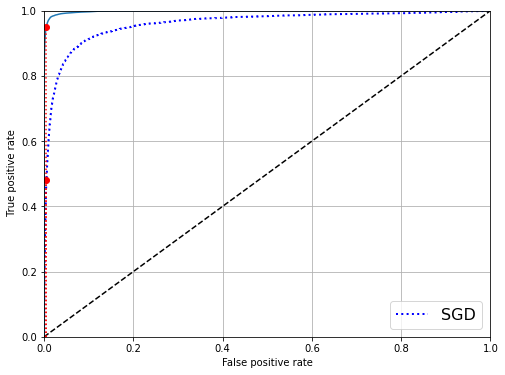

In [166]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show();

In [167]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [168]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [169]:

recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

## Multiclass Classification

In [171]:
from sklearn.svm import SVC

svm_clf = SVC(gamma ='auto', random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

That was easy! This code trains the SGDClassifier on the training set using the origi‐
nal target classes from 0 to 9 (y_train), instead of the 5-versus-all target classes
(y_train_5). Then it makes a prediction (a correct one in this case). Under the hood,
Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the
image, and selected the class with the highest score.
To see that this is indeed the case, you can call the decision_function() method.
Instead of returning just one score per instance, it now returns 10 scores, one per
class:


In [172]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

## he highest score is indeed the one corresponding to class 5:

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [173]:
np.argmax(some_digit_scores)

5

In [174]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [175]:
svm_clf.classes_[5]

5

In [177]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma='auto', random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [178]:
len(ovr_clf.estimators_)

10

In [180]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [181]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [182]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

## Error Analysis

In [184]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

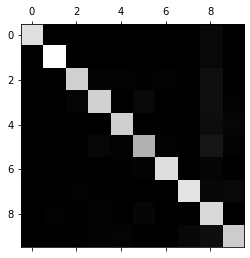

In [185]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [186]:
rows_sum = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx / rows_sum

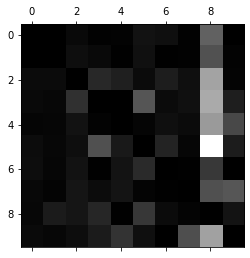

In [187]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show();

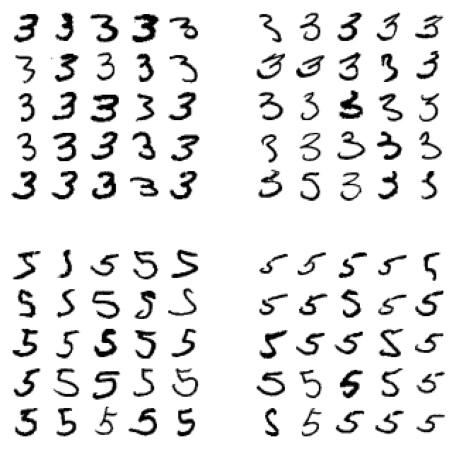

In [188]:
cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## Multilabel Classification

This code creates a y_multilabel array containing two target labels for each digit
image: the first indicates whether or not the digit is large (7, 8, or 9) and the second
indicates whether or not it is odd. The next lines create a KNeighborsClassifier
instance (which supports multilabel classification, but not all classifiers do) and we
train it using the multiple targets array. Now you can make a prediction, and notice
that it outputs two labels:


In [189]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [190]:

knn_clf.predict([some_digit])

## succesfull that 5 is not large and is odd

array([[False,  True]])

In [191]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

## Multioutput classification

In [192]:
## noise having same specificatons as that of images

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

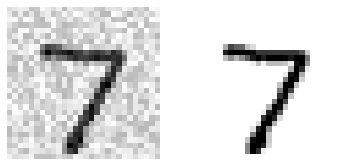

In [193]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show();

## Extra Variable

## Dummy (i.e) Random Variable

In [194]:
from sklearn.dummy import DummyClassifier

dmy_clf = DummyClassifier(strategy='prior')
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_scores_dmy = y_probas_dmy[:, 1]

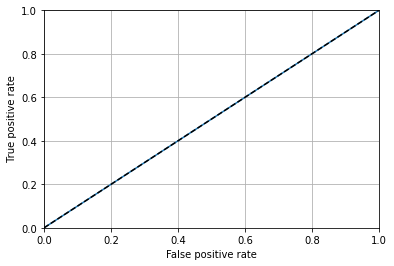

In [195]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN Classifier

In [196]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [197]:
y_knn_pred = knn_clf.predict(X_test)

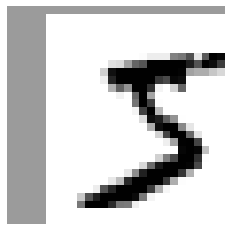

In [198]:
from scipy.ndimage.interpolation import shift

def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [199]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)
    
X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [200]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [201]:
y_knn_expanded_pred = knn_clf.predict(X_test)
y_knn_expanded_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [202]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [203]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

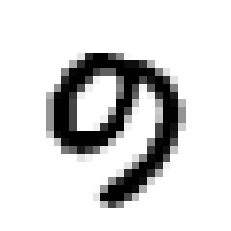

In [204]:
plot_digit(ambiguous_digit)